<a href="https://colab.research.google.com/github/Cesarso/Python-para-DataScience/blob/main/Identificando_e_Removendo_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [ ]:
dados = pd.read_csv('aluguel_residencial.csv', sep= ';')

In [ ]:
#<img src='Box-Plot.png' width=70%>

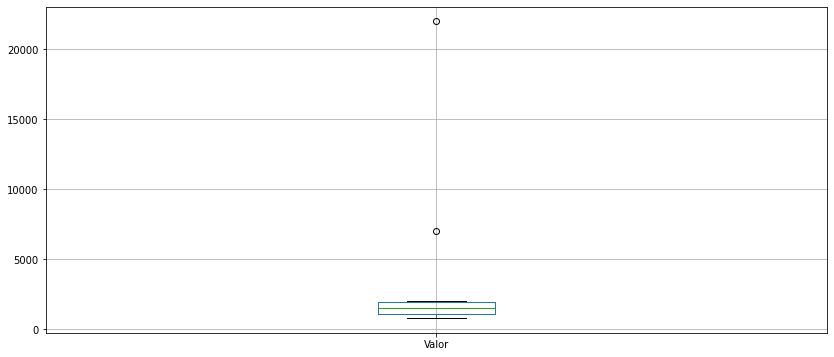

In [ ]:
dados.boxplot(['Valor'])

In [ ]:
dados[dados['Valor'] >= 50000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado


In [ ]:
valor = dados['Valor']

In [ ]:
plt.rc('figure', figsize = (8, 3))

In [ ]:
dados = pd.read_csv('aluguel_residencial.csv', sep= ';')

In [ ]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


In [ ]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

dados_new = dados[selecao]

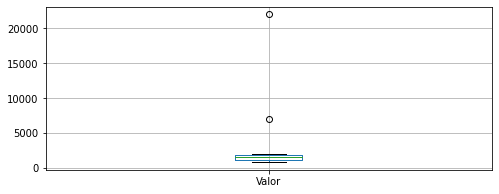

In [ ]:
dados.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0787858780>]],
      dtype=object)

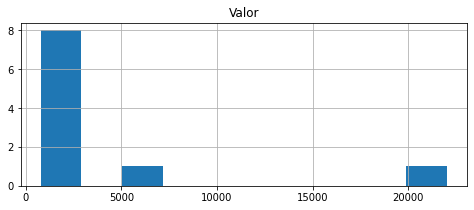

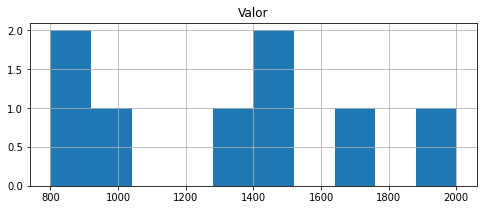

In [ ]:
dados.hist(['Valor'])

dados_new.hist(['Valor'])

In [ ]:
# exercicio

In [ ]:
data = pd.read_csv('aluguel_amostra.csv', sep = ';')
data.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento


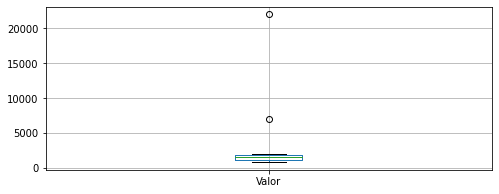

In [ ]:
dados.boxplot(['Valor'])

In [ ]:
grupo_tipo = dados.groupby('Tipo')


In [ ]:
type(grupo_tipo)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9], 'Casa': [1], 'Casa de Condomínio': [5, 6], 'Quitinete': [0]}

In [ ]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
Q1

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2
Tipo,,,,,,,,
Apartamento,1.00,0.0,0.00,42.00,925.0,323.25,14.75,17.8600
Casa,2.00,0.0,1.00,100.00,7000.0,0.00,0.00,70.0000
Casa de Condomínio,2.75,2.5,1.25,236.25,6250.0,0.00,0.00,18.8675
Quitinete,1.00,0.0,0.00,40.00,1700.0,500.00,60.00,42.5000


In [ ]:
Q3

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2
Tipo,,,,,,,,
Apartamento,2.00,0.75,0.75,65.00,1500.0,534.5,42.5,44.0000
Casa,2.00,0.00,1.00,100.00,7000.0,0.0,0.0,70.0000
Casa de Condomínio,4.25,3.50,3.75,578.75,16750.0,0.0,0.0,25.8425
Quitinete,1.00,0.00,0.00,40.00,1700.0,500.0,60.0,42.5000


In [ ]:
limite_inferior

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2
Tipo,,,,,,,,
Apartamento,-0.5,-1.125,-1.125,7.5,62.5,6.375,-26.875,-21.350
Casa,2.0,0.000,1.000,100.0,7000.0,0.000,0.000,70.000
Casa de Condomínio,0.5,1.000,-2.500,-277.5,-9500.0,0.000,0.000,8.405
Quitinete,1.0,0.000,0.000,40.0,1700.0,500.000,60.000,42.500


In [ ]:
limite_superior


,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2
Tipo,,,,,,,,
Apartamento,3.5,1.875,1.875,99.5,2362.5,851.375,84.125,83.210
Casa,2.0,0.000,1.000,100.0,7000.0,0.000,0.000,70.000
Casa de Condomínio,6.5,5.000,7.500,1092.5,32500.0,0.000,0.000,36.305
Quitinete,1.0,0.000,0.000,40.0,1700.0,500.000,60.000,42.500


In [ ]:
dados_new = pd.DataFrame()


for tipo in grupo_tipo.groups.keys():
  eh_tipo = dados['Tipo'] == tipo
  eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) and (dados['Valor'] <= limite_superior[tipo])
  selecao = eh_tipo & eh_dentro_limite
  dados_selecao = dados[selecao]
  dados_new = pd.concat([dado_new, dados_selecao])


KeyError: ignored